In [1]:
import pandas as pd
import seaborn as sns
import json
import os
import glob
import numpy as np

In [2]:
folder_path = "./data/"
df_new = pd.DataFrame()

all_files = glob.glob(folder_path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df_new_외국인_업종 = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df_new_외국인_업종.head()

,기준년월,시도명,시군구명,국적명,업종분류명,사용금액
0,2015-01,경기도,고양시 일산서구,홍콩,유통.편의점,40950
1,2015-01,경기도,오산시,영국,요식/유흥.커피전문점,14500
2,2015-01,경기도,광명시,몽고,유통.생활잡화,2740000
3,2015-01,경기도,성남시 중원구,아제르바이잔,의류/잡화.남.여기성복,1429800
4,2015-01,경기도,성남시 분당구,캐나다,요식/유흥.한식,5336500


> 시군구명 

In [4]:
b = []
for name in list(df_new_외국인_업종.시군구명):
    b.append(name.split()[0])
b[0]

'고양시'

In [5]:
df_new_외국인_업종['시군구명_new'] = [name.split()[0] for name in list(df_new_외국인_업종.시군구명)]
df_new_외국인_업종.head(1)

,기준년월,시도명,시군구명,국적명,업종분류명,사용금액,시군구명_new
0,2015-01,경기도,고양시 일산서구,홍콩,유통.편의점,40950,고양시


>업종대분류,소분류

In [7]:
# 의류/잡화.남.여기성복

In [6]:
list(df_new_외국인_업종.업종분류명)[4]

'요식/유흥.한식'

In [7]:
a = []
for name in list(df_new_외국인_업종.업종분류명):
    a.append(name.split(".")[1])
a[4]

'한식'

In [8]:
df_new_외국인_업종['업종대분류'] = [name.split(".")[0] for name in list(df_new_외국인_업종.업종분류명)]
df_new_외국인_업종['업종소분류'] = [name.split(".")[1] for name in list(df_new_외국인_업종.업종분류명)]
df_new_외국인_업종.head(5)

,기준년월,시도명,시군구명,국적명,업종분류명,사용금액,시군구명_new,업종대분류,업종소분류
0,2015-01,경기도,고양시 일산서구,홍콩,유통.편의점,40950,고양시,유통,편의점
1,2015-01,경기도,오산시,영국,요식/유흥.커피전문점,14500,오산시,요식/유흥,커피전문점
2,2015-01,경기도,광명시,몽고,유통.생활잡화,2740000,광명시,유통,생활잡화
3,2015-01,경기도,성남시 중원구,아제르바이잔,의류/잡화.남.여기성복,1429800,성남시,의류/잡화,남
4,2015-01,경기도,성남시 분당구,캐나다,요식/유흥.한식,5336500,성남시,요식/유흥,한식


In [9]:
list(df_new_외국인_업종.업종분류명)[3].split(".")

['의류/잡화', '남', '여기성복']

In [10]:
# np.where(조건, 참인 경우 값, 거짓인 경우 값)
# df_new_외국인_업종['업종소분류']의 값이 "남"인 경우에는 "남/여기성복"으로 값을 바꾸고, 그 외의 경우에는 원래의 값 그대로를 반환
df_new_외국인_업종['업종소분류'] = np.where(df_new_외국인_업종.업종소분류 == '남', "남/여기성복", df_new_외국인_업종.업종소분류)

In [11]:
df_new_외국인_업종

,기준년월,시도명,시군구명,국적명,업종분류명,사용금액,시군구명_new,업종대분류,업종소분류
0,2015-01,경기도,고양시 일산서구,홍콩,유통.편의점,40950,고양시,유통,편의점
1,2015-01,경기도,오산시,영국,요식/유흥.커피전문점,14500,오산시,요식/유흥,커피전문점
2,2015-01,경기도,광명시,몽고,유통.생활잡화,2740000,광명시,유통,생활잡화
3,2015-01,경기도,성남시 중원구,아제르바이잔,의류/잡화.남.여기성복,1429800,성남시,의류/잡화,남/여기성복
4,2015-01,경기도,성남시 분당구,캐나다,요식/유흥.한식,5336500,성남시,요식/유흥,한식
...,...,...,...,...,...,...,...,...,...
1003,2015-09,경기도,하남시,홍콩,요식/유흥.한식,599400,하남시,요식/유흥,한식
1004,2015-09,경기도,시흥시,중국,유통.할인점/슈퍼마켓,62748084,시흥시,유통,할인점/슈퍼마켓
1005,2015-09,경기도,포천시,미국,요식/유흥.단란주점,29900,포천시,요식/유흥,단란주점
1006,2015-09,경기도,가평군,스리랑카,요식/유흥.일반대중음식,42000,가평군,요식/유흥,일반대중음식


In [31]:
# 년월별 사용금액
a = df_new_외국인_업종[['기준년월', '사용금액']].groupby('기준년월').sum()
# a.sort_values(ascending=False) # 시리즈
a.sort_values(by='사용금액', ascending=False) # 사용금액를 기준으로 내림차순정렬 데이터프레임

,사용금액
기준년월,
2016-02,1073231914
2016-04,463186289
2015-04,369513421
2016-06,331427498
2015-02,234082232
2016-05,164499976
2015-06,163637770
2016-03,110348195
2016-12,88020075


In [16]:
# '추세(趨勢)'는 '어떤 현상이 일정한 방향으로 나아가는 경향'으로 돼 있고, 
# 추세(Trend)는 일련의 데이터 포인트에서 나타나는 장기적인 방향성이나 경향을 의미

# '추이(推移)'는 '일이나 형편이 시간의 경과에 따라 변하여 나감. 또는 그런 경향'
# 추이(Pattern)는 데이터의 짧은 기간 동안 나타나는 주기성이나 반복 패턴을 의미

>외국인 소비 금액 추이

In [24]:
# matplotlib 설정하기
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

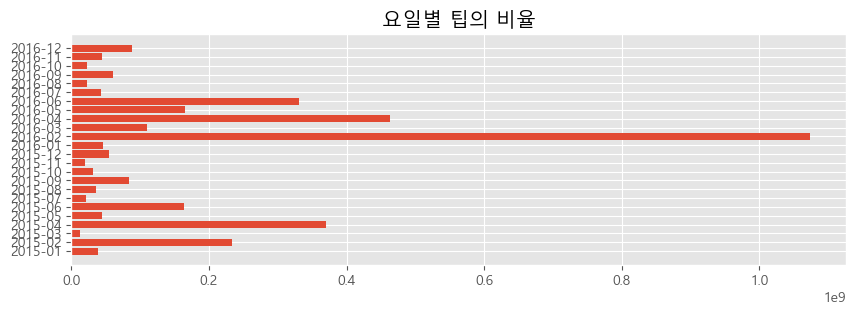

In [28]:
plt.figure(figsize=(10,3))
plt.barh(a.index, a['사용금액'])
plt.title('요일별 팁의 비율')
plt.show()

AttributeError: 'Index' object has no attribute 'strftime'

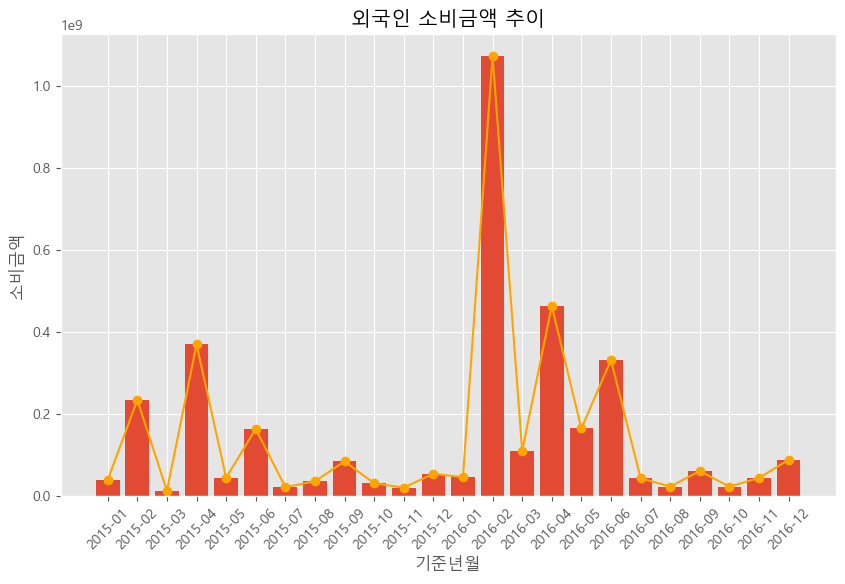

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# df_sum = df_new_외국인_업종.groupby('기준년월').sum()
df_sum = df_new_외국인_업종[['기준년월', '사용금액']].groupby('기준년월').sum()

plt.figure(figsize=(10, 6))
plt.plot(df_sum.index, df_sum['사용금액'], marker='o', color='orange', label='Lines+Markers')
plt.bar(df_sum.index, df_sum['사용금액'], label='Bar')

plt.xlabel('기준년월')
plt.ylabel('소비금액')
plt.title('외국인 소비금액 추이')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df_sum.index.strftime('%Y-%m')))
plt.legend()

plt.show()


C:\Users\YONSAI\AppData\Local\Temp\ipykernel_8356\172828074.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df_sum.index.strftime('%Y-%m')))


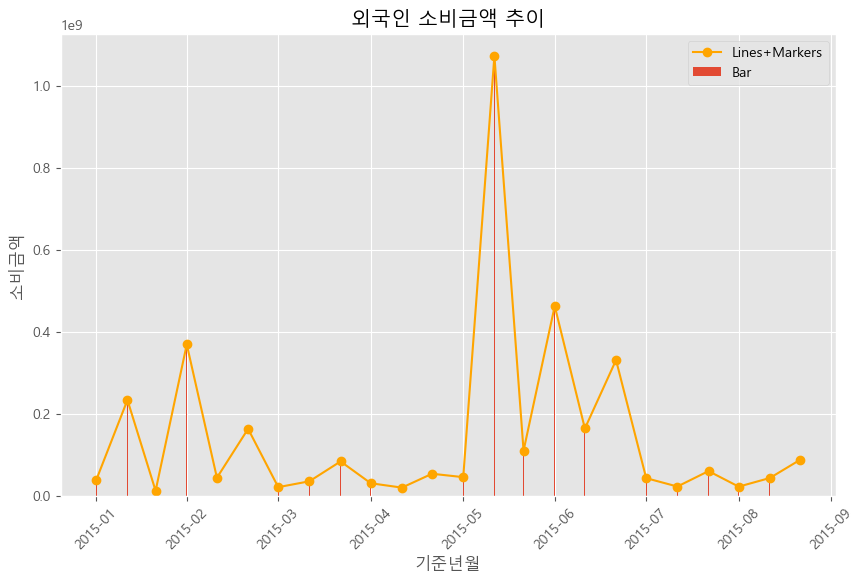

In [36]:
df_sum = df_new_외국인_업종.groupby('기준년월').sum()
# df_sum = df_new_외국인_업종[['기준년월', '사용금액']].groupby('기준년월').sum()

df_sum.index = pd.to_datetime(df_sum.index)

plt.figure(figsize=(10, 6))
plt.plot(df_sum.index, df_sum['사용금액'], marker='o', color='orange', label='Lines+Markers')
plt.bar(df_sum.index, df_sum['사용금액'], label='Bar')

plt.xlabel('기준년월')
plt.ylabel('소비금액')
plt.title('외국인 소비금액 추이')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df_sum.index.strftime('%Y-%m')))
plt.legend()

plt.show()

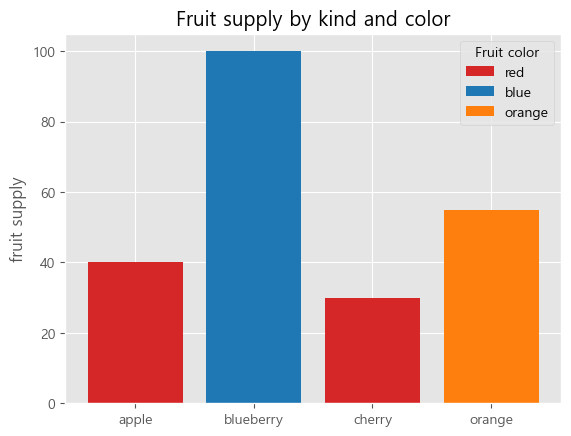

In [26]:
# 다양한 컬러 막대그래프 bar chart


fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange'] # color

plt.bar(fruits, counts, label=bar_labels, color=bar_colors) # 모든 ex를 plt로 바꿔줌

plt.ylabel('fruit supply') # set을 지워줌
plt.title('Fruit supply by kind and color') # set을 지워줌
plt.legend(title='Fruit color')

plt.show()